## Random Tree Classifier

## Step1 :  Data Gathering

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
path = r"C:\Users\Akshay\OneDrive\Desktop\datasets\train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step2: Perform basic data quality checks

In [3]:
df.shape

(2000, 21)

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
df =df.drop_duplicates()

## Step3: Separate X and Y features

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
X =df.drop(columns=['price_range'])
Y =df['price_range']

In [14]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [15]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Step4: Data Preprocessing and Data Cleaning

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
cat =list(X.columns[X.dtypes=='object'])
con =list(X.columns[X.dtypes!='object'])

In [18]:
print(cat)

[]


In [19]:
print(con)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [20]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [21]:
con_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

In [22]:
pre = ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',con_pipe,con)
]).set_output(transform='pandas')

In [23]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step6: SPlit the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [26]:
xtrain.head()

,con__battery_power,con__blue,con__clock_speed,con__dual_sim,con__fc,con__four_g,con__int_memory,con__m_dep,con__mobile_wt,con__n_cores,con__pc,con__px_height,con__px_width,con__ram,con__sc_h,con__sc_w,con__talk_time,con__three_g,con__touch_screen,con__wifi
1490,-0.508796,1.010051,-0.885327,-1.019184,0.159088,-1.043966,-1.105027,-0.006069,-1.080761,-0.664768,0.673534,-0.698961,-1.324987,0.155641,-1.734608,-1.094526,-1.649584,-1.786861,0.994018,-1.014099
965,0.319779,-0.990050,-1.253064,0.981177,-0.762495,-1.043966,-0.719165,-0.699686,-0.176571,1.521249,1.168355,-0.581757,-1.343502,1.648549,-0.310171,-0.864922,1.462493,-1.786861,0.994018,0.986097
1216,-0.183285,-0.990050,-1.007906,0.981177,-0.762495,0.957886,-0.167933,0.687548,-0.487386,-1.101971,1.663176,-0.753055,1.260114,-0.536869,1.114266,0.742313,0.730240,0.559641,-1.006018,0.986097
500,0.089872,1.010051,-1.253064,0.981177,-0.762495,-1.043966,1.210147,-1.393304,-1.024249,1.521249,1.003414,-0.144495,-1.160670,-0.893728,-1.259796,-1.094526,1.645557,-1.786861,-1.006018,0.986097
403,0.540580,1.010051,-0.395011,0.981177,-0.992890,0.957886,1.265271,-1.393304,0.868898,-0.227564,-0.810929,2.244669,0.959252,-0.548856,0.164641,0.512708,-1.466521,0.559641,-1.006018,0.986097


In [27]:
ytrain.head()

1490    1
965     3
1216    1
500     0
403     2
Name: price_range, dtype: int64

## Step7.1: Model Building
Bagging model : Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)

In [30]:
model.score(xtrain,ytrain)

1.0

In [31]:
model.score(xtest,ytest)

0.8925

## Hyperparameter tuning- overfitting scenario, choose the best parameters required for the model

In [32]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [5, 10, 35, 50, 75, 100,
                                                         150]},
                   scoring='f1_macro')

In [35]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 11}

In [36]:
rscv.best_score_

np.float64(0.871879452740249)

In [37]:
best_rfc = rscv.best_estimator_

In [38]:
best_rfc.score(xtrain,ytrain)

1.0

In [39]:
best_rfc.score(xtest,ytest)

0.9

## Step8: Model Evaluation

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([3, 0, 0, 0, 3])

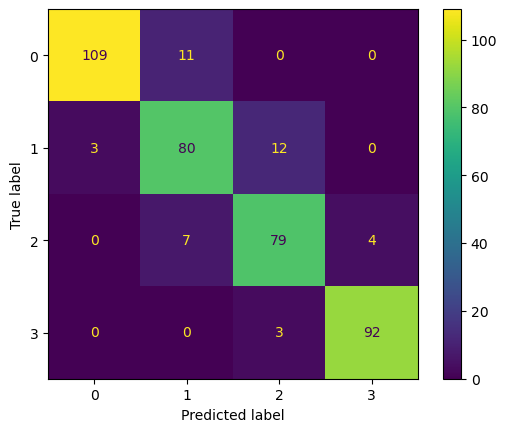

In [42]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       120
           1       0.80      0.86      0.83        95
           2       0.83      0.83      0.83        90
           3       0.95      0.95      0.95        95

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



### Let's build Gradient Boost and XGBoost. We shall choose the best model among these three